<a href="https://colab.research.google.com/github/M0n1ka-05/Topic-Modelling-on-news-article/blob/main/Monika_Shinde_Team_3_Capestone_Project_4_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
import ast

In [57]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [3]:
business_path= glob.glob("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/bbc/business/*.txt")
entertainment_path = glob.glob("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/bbc/entertainment/*.txt")
politics_path = glob.glob("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/bbc/politics/*.txt")
sports_path = glob.glob("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/bbc/sport/*.txt")
tech_path = glob.glob("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/bbc/tech/*.txt")


In [4]:
len(tech_path)

401

In [7]:
#file_list = [business_path[:400],entertainment_path[:400],politics_path[:400],sports_path[:400],tech_path[:400]]
file_list = [business_path,entertainment_path,politics_path,sports_path,tech_path]


In [8]:
corpus = []

for file_path in file_list:
  for path in file_path:
    with open(path,encoding='utf-8', errors='ignore') as file_input:
      corpus.append(file_input.read())
print (corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
len(corpus)

2225

In [10]:
type(corpus)

list

In [11]:
new_df = pd.DataFrame (corpus,columns=['news'])

In [12]:
new_df.head(5)

,news
0,Yukos unit buyer faces loan claim\n\nThe owner...
1,Ad sales boost Time Warner profit\n\nQuarterly...
2,Dollar gains on Greenspan speech\n\nThe dollar...
3,US trade gap hits record in 2004\n\nThe gap be...
4,High fuel prices hit BA's profits\n\nBritish A...


In [31]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [16]:
def rmv_punctuation(text):
    return ''.join(s for s in text if s not in punctuation)

In [19]:
new_df['news'] = new_df['news'].apply(rmv_punctuation)


In [39]:
new_df['tokenized_news'] = new_df.apply(lambda row: word_tokenize(row['news']), axis=1)

In [40]:
new_df.head(5)

,news,tokenized_news
0,Yukos unit buyer faces loan claim\n\nThe owner...,"[Yukos, unit, buyer, faces, loan, claim, The, ..."
1,Ad sales boost Time Warner profit\n\nQuarterly...,"[Ad, sales, boost, Time, Warner, profit, Quart..."
2,Dollar gains on Greenspan speech\n\nThe dollar...,"[Dollar, gains, on, Greenspan, speech, The, do..."
3,US trade gap hits record in 2004\n\nThe gap be...,"[US, trade, gap, hits, record, in, 2004, The, ..."
4,High fuel prices hit BAs profits\n\nBritish Ai...,"[High, fuel, prices, hit, BAs, profits, Britis..."


In [44]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

In [45]:
new_df['tokenized_news'] =  new_df['tokenized_news'].apply(lemmatize_text)

In [46]:
new_df.head(5)

,news,tokenized_news
0,Yukos unit buyer faces loan claim\n\nThe owner...,"[Yukos, unit, buyer, face, loan, claim, The, o..."
1,Ad sales boost Time Warner profit\n\nQuarterly...,"[Ad, sale, boost, Time, Warner, profit, Quarte..."
2,Dollar gains on Greenspan speech\n\nThe dollar...,"[Dollar, gain, on, Greenspan, speech, The, dol..."
3,US trade gap hits record in 2004\n\nThe gap be...,"[US, trade, gap, hit, record, in, 2004, The, g..."
4,High fuel prices hit BAs profits\n\nBritish Ai...,"[High, fuel, price, hit, BAs, profit, British,..."


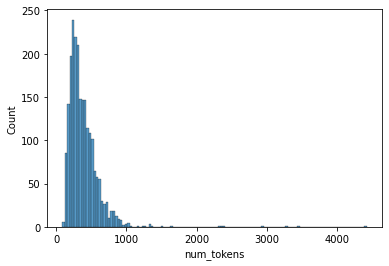

In [52]:
# Sum the number of tokens in each Doc
new_df['num_tokens'] = [len(token) for token in new_df.tokenized_news]
# Visualize histogram of tokens per tweet
g = sns.histplot(new_df.num_tokens)

In [53]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

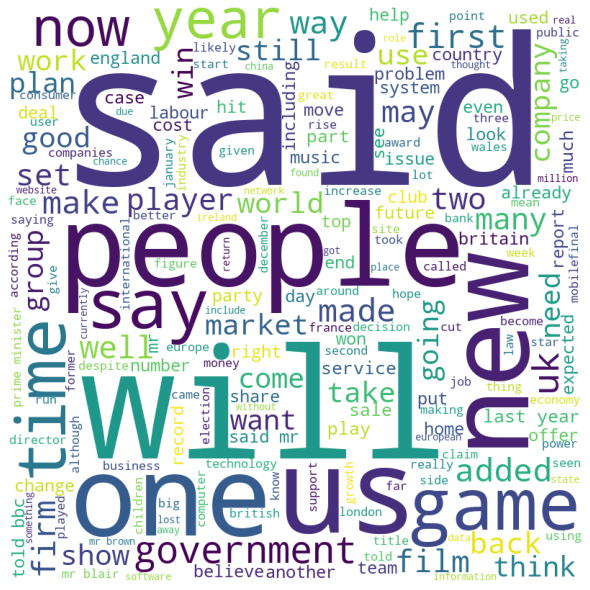

In [54]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in new_df.news: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [68]:
new_df.head(5)

,news,tokenized_news,num_tokens
0,Yukos unit buyer faces loan claim\n\nThe owner...,"[Yukos, unit, buyer, face, loan, claim, The, o...",264
1,Ad sales boost Time Warner profit\n\nQuarterly...,"[Ad, sale, boost, Time, Warner, profit, Quarte...",421
2,Dollar gains on Greenspan speech\n\nThe dollar...,"[Dollar, gain, on, Greenspan, speech, The, dol...",382
3,US trade gap hits record in 2004\n\nThe gap be...,"[US, trade, gap, hit, record, in, 2004, The, g...",325
4,High fuel prices hit BAs profits\n\nBritish Ai...,"[High, fuel, price, hit, BAs, profit, British,...",401


In [75]:
converted_list = [str(element) for element in new_df['tokenized_news']]

In [77]:
type(converted_list)

list

In [69]:
news_data = new_df['tokenized_news']

In [71]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_news = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_news, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [73]:
news_data.values

array([list(['Yukos', 'unit', 'buyer', 'face', 'loan', 'claim', 'The', 'owner', 'of', 'embattled', 'Russian', 'oil', 'giant', 'Yukos', 'are', 'to', 'ask', 'the', 'buyer', 'of', 'it', 'former', 'production', 'unit', 'to', 'pay', 'back', 'a', '900m', '£479m', 'loan', 'Stateowned', 'Rosneft', 'bought', 'the', 'Yugansk', 'unit', 'for', '93bn', 'in', 'a', 'sale', 'forced', 'by', 'Russia', 'to', 'part', 'settle', 'a', '275bn', 'tax', 'claim', 'against', 'Yukos', 'Yukos', 'owner', 'Menatep', 'Group', 'say', 'it', 'will', 'ask', 'Rosneft', 'to', 'repay', 'a', 'loan', 'that', 'Yugansk', 'had', 'secured', 'on', 'it', 'asset', 'Rosneft', 'already', 'face', 'a', 'similar', '540m', 'repayment', 'demand', 'from', 'foreign', 'bank', 'Legal', 'expert', 'said', 'Rosnefts', 'purchase', 'of', 'Yugansk', 'would', 'include', 'such', 'obligation', 'The', 'pledged', 'asset', 'are', 'with', 'Rosneft', 'so', 'it', 'will', 'have', 'to', 'pay', 'real', 'money', 'to', 'the', 'creditor', 'to', 'avoid', 'seizure', 

In [72]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=news_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

AttributeError: ignored